https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html
https://www.cs.ryerson.ca/~aharley/vis/conv/

In [ ]:
!pip install tensorflow-gpu==2.0.0

In [ ]:
!pip install mlxtend==0.17.0

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense,Conv2D,MaxPool2D,Dropout

In [2]:
print(tf.__version__)

2.7.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [4]:
from tensorflow.keras.datasets import cifar10

In [5]:
(x_train,y_train),(x_test, y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [6]:
classes_name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [7]:
x_train.max()

255

In [8]:
x_train=x_train/255
x_test=x_test/255

In [9]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

In [ ]:
plt.imshow(x_test[0])

In [ ]:
y_test

In [ ]:

model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=[32,32,3]))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=20,epochs=10,verbose=1,validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 210s 4ms/sample - loss: 1.3806 - sparse_categorical_accuracy: 0.5075 - val_loss: 1.0714 - val_sparse_categorical_accuracy: 0.6190
Epoch 2/10
50000/50000 [==============================] - 207s 4ms/sample - loss: 1.0614 - sparse_categorical_accuracy: 0.6256 - val_loss: 0.9849 - val_sparse_categorical_accuracy: 0.6499
Epoch 3/10
50000/50000 [==============================] - 200s 4ms/sample - loss: 0.9300 - sparse_categorical_accuracy: 0.6724 - val_loss: 0.9085 - val_sparse_categorical_accuracy: 0.6824
Epoch 4/10
50000/50000 [==============================] - 202s 4ms/sample - loss: 0.8324 - sparse_categorical_accuracy: 0.7049 - val_loss: 0.9390 - val_sparse_categorical_accuracy: 0.6724
Epoch 5/10
50000/50000 [==============================] - 203s 4ms/sample - loss: 0.7539 - sparse_categorical_accuracy: 0.7319 - val_loss: 0.9170 - val_sparse_categorical_accuracy: 0.6817
Epoch 6/10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


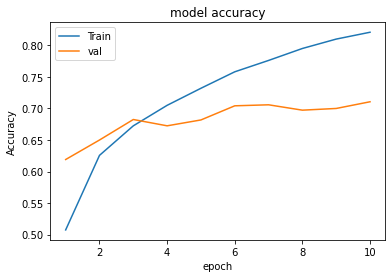

In [ ]:
epoch_range = range(1,11)
plt.plot(epoch_range,history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range,history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train','val'],loc='upperleft')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


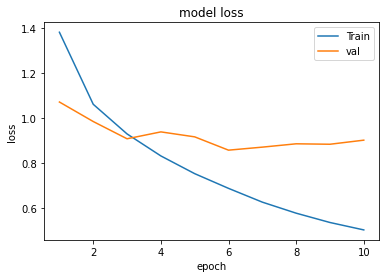

In [ ]:

plt.plot(epoch_range,history.history['loss'])
plt.plot(epoch_range,history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','val'],loc='upperleft')
plt.show()

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model.predict_classes(x_test)
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
mat = confusion_matrix(y_test,y_pred)

In [ ]:
mat

array([[743,  19,  47,  25,  26,   4,  10,  11,  68,  47],
       [ 12, 808,   7,  12,   1,   2,  11,   3,  31, 113],
       [ 61,   6, 562,  63,  82,  85,  77,  33,  17,  14],
       [ 12,   9,  53, 512,  64, 207,  76,  38,  10,  19],
       [ 23,   3,  57,  75, 647,  49,  74,  60,   8,   4],
       [  7,   3,  49, 149,  48, 657,  15,  52,   9,  11],
       [  5,   5,  35,  63,  35,  46, 787,   9,   9,   6],
       [ 13,   7,  28,  38,  65,  57,   9, 764,   4,  15],
       [ 52,  41,   4,  19,   7,   8,   6,   3, 824,  36],
       [ 26,  80,   5,  17,   7,   6,   4,  19,  35, 801]])